In [1]:

import pandas as pd
import sys

sys.path.insert(1, '../')

from rule_benchmark import *

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [3]:
FOLDERS = ["approach1", "approach2"]

In [4]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")


Number of rules:  67
Number of input variables:  5
Number of output variables:  3

approach1/:

Container_DataLayout:
Train: 0.9849017977096794
Test: 0.9843225083986562

Traversal:
Train: 0.9692679975801572
Test: 0.9794961921499707

Newton 3:
Train: 1.0
Test: 1.0


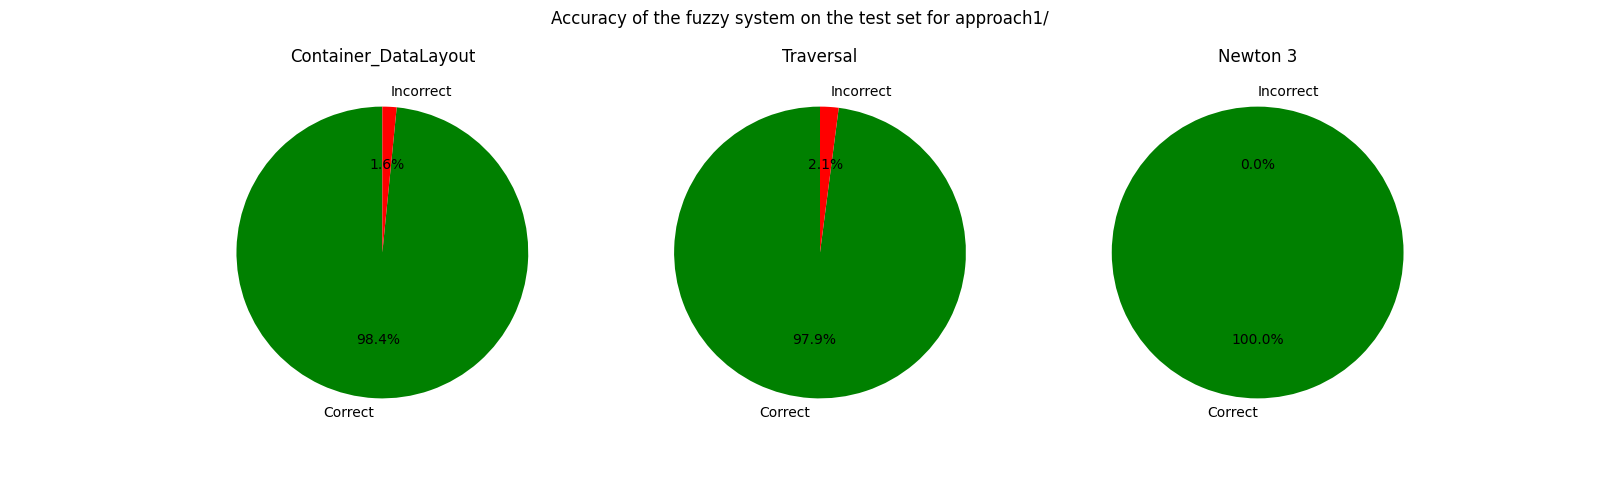

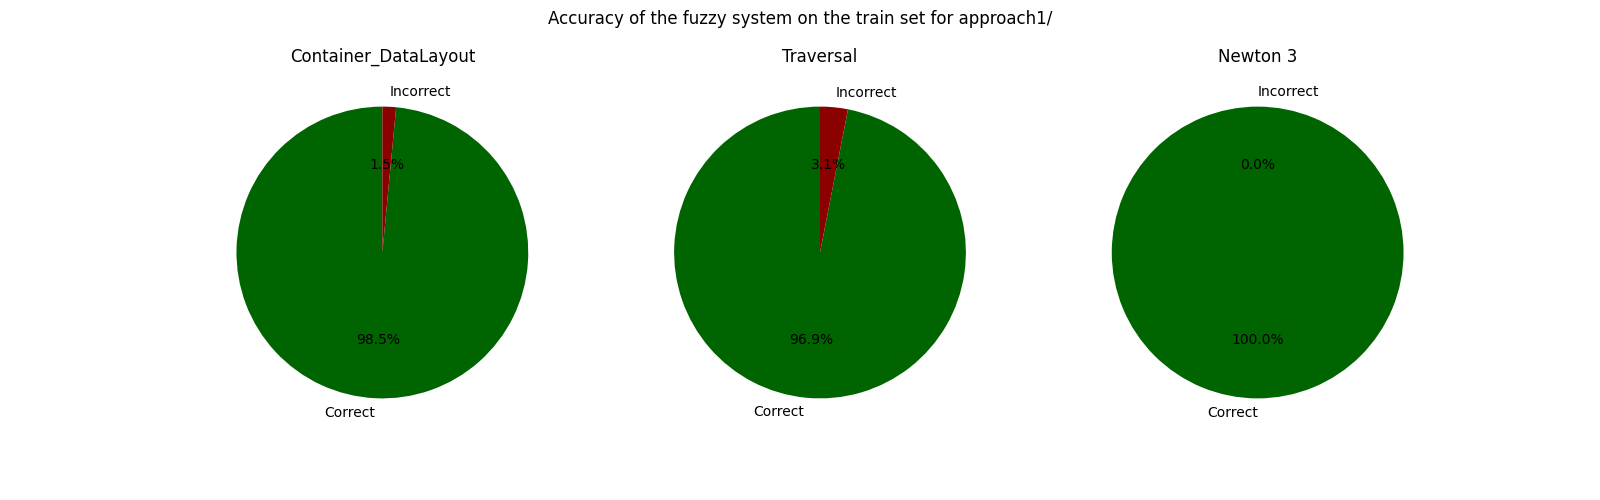

Number of rules:  89
Number of input variables:  5
Number of output variables:  3

approach2/:

Container_DataLayout:
Train: 0.988050784167289
Test: 0.9813477737665464

Traversal:
Train: 0.9610246623605402
Test: 0.9537719795802609

Newton 3:
Train: 0.9918300653594772
Test: 0.9938398357289527


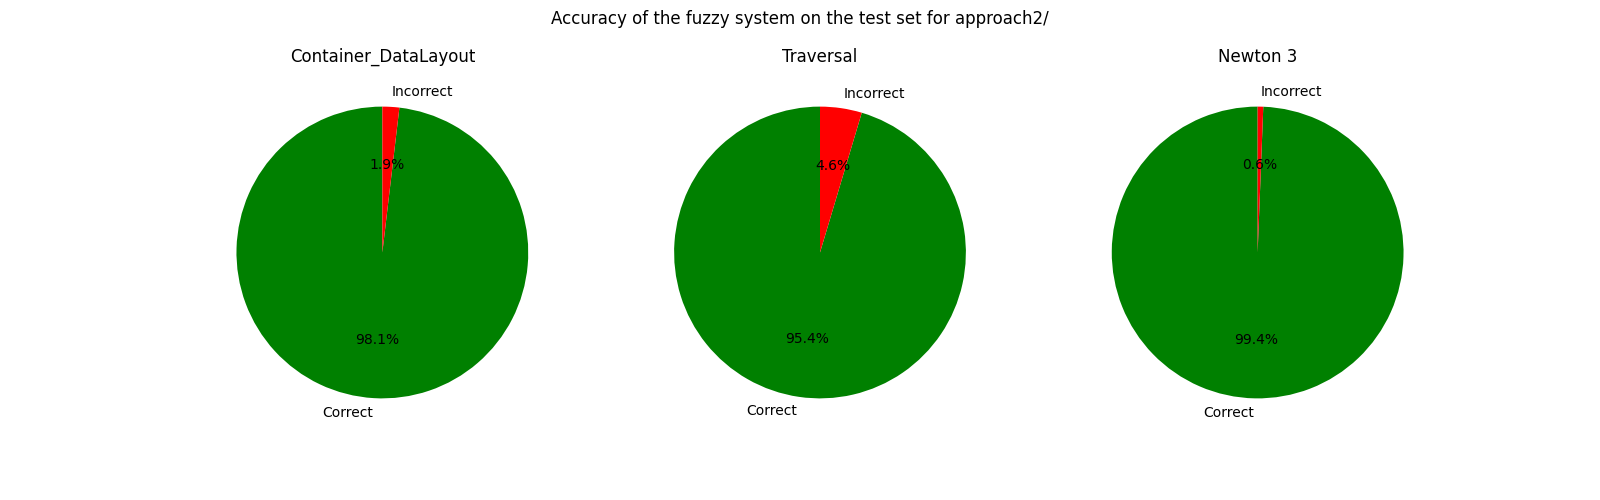

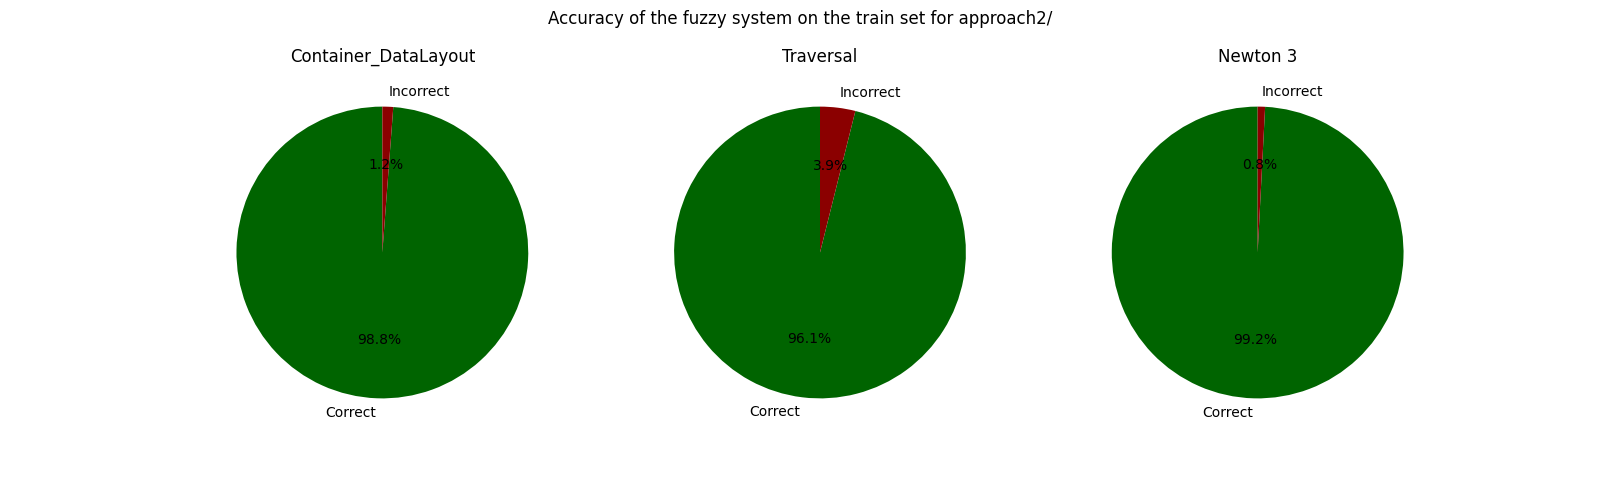

In [5]:
# The K parameter selects how many defuzzified predictions are used in order of decreasing confidence

fiss, algo_ranking = benchmark_rules("approach1/", train, test, K=1, n=600)
fiss, algo_ranking = benchmark_rules("approach2/", train, test, K=1, n=600)

# Findings

- MoM works way better than the other methods.
- This is probably since the output variable is categorical and therefore interpolating between them is not a good idea.
  - Also the placement on the x-axis is somehow arbitrary. This also makes interpolation meaningless
- Traversal is very hard to predict. Maybe because there are so many possible values.

Union:  "("("("("("("("("("("("("("("("("("("("("("("("("("("("("("("("("("(Traversal is "vcl_c01_balanced, vl_list_iteration, vlc_c01": Gaussian(7.800000000000001, 0.06190476190476191))↑0.00" or "(Traversal is "lc_c08, vl_list_iteration, vlc_c01, vlc_c18": Gaussian(6.066666666666666, 0.06190476190476191))↑0.00")" or "(Traversal is "vl_list_iteration, vlc_c01": Gaussian(9.533333333333333, 0.06190476190476191))↑0.00")" or "(Traversal is "vlc_c01, vlc_c18": Gaussian(12.133333333333333, 0.06190476190476191))↑0.00")" or "(Traversal is "lc_c08, vl_list_iteration, vlc_c01": Gaussian(5.2, 0.06190476190476191))↑0.00")" or "(Traversal is "vl_list_iteration, vlc_c01, vlc_c18": Gaussian(10.4, 0.06190476190476191))↑0.00")" or "(Traversal is "lc_c04, lc_c08, lc_c18, vcl_c06, vl_list_iteration, vlc_c01, vlc_c18, vlc_sliced_c02": Gaussian(1.7333333333333334, 0.06190476190476191))↑0.00")" or "(Traversal is "lc_c08, vl_list_iteration, vlc_c01, vlc_c18": Gaussian(6.066666666666666, 0.06190476190476191))

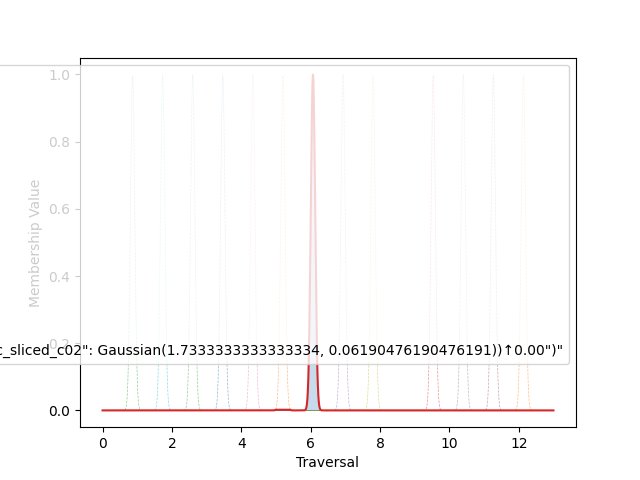

In [6]:
data = {"maxDensity": 0.2, "maxParticlesPerCell": 5,  "homogeneity": 0.5,
        "particlesPerCellStdDev": 1, "avgParticlesPerCell": 1.2, "threadCount": 10}


union = fiss["Traversal"].applyRules(data)

fig, ax = plt.subplots()
union.plot(ax=ax, n=1000)

print("Union: ", union)

prediction = fiss["Traversal"].predictClosest(
    data, algo_ranking["Traversal"], n=600)[1]

print("Prediction: ", prediction)